### Problem Statement
### Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem. In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
### 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings  # to avoid warnings messages before code
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.impute import SimpleImputer

In [2]:
### 2 Load Dataset for Analysis purpose
data= pd.read_csv('Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
### 3 Check in there are any duplicate policy number in data set.
data.duplicated('policy_number').sum()

0

In [5]:
data=data.replace('?',np.NaN)
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

### Data Cleaning 

In [8]:

data['csl_per_person'] = data.policy_csl.str.split('/', expand=True)[0]
data['csl_per_accident'] = data.policy_csl.str.split('/', expand=True)[1]

In [9]:
### Changes in target variable string to int for analysis
data['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
data['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,csl_per_person,csl_per_accident
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,1,NaN,250,500
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,1,NaN,250,500
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,0,NaN,100,300
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN,250,500
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,0,NaN,500,1000


In [10]:
data=data.replace('?',0)
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,csl_per_person,csl_per_accident
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,1,NaN,250,500
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,1,NaN,250,500
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,0,NaN,100,300
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN,250,500
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,0,NaN,500,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,17440,8720,61040,Honda,Accord,2006,0,NaN,500,1000
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,18080,18080,72320,Volkswagen,Passat,2015,0,NaN,100,300
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,7500,7500,52500,Suburu,Impreza,1996,0,NaN,250,500
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,5220,5220,36540,Audi,A5,1998,0,NaN,500,1000


In [11]:
### 4  Create lists to store column names and corresponding percentages of missing data
columns_with_missing_data = []
percent_missing_data = []

# Loop through each column in the DataFrame
for column in data.columns:
    missing_count = data[column].isnull().sum()
    percent_missing = (missing_count / len(data)) * 100

    # Check if there is missing data in the column
    if missing_count > 0:
        columns_with_missing_data.append(column)
        percent_missing_data.append(percent_missing)

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Column': columns_with_missing_data,
    'Percentage Missing': percent_missing_data
})

# DataFrame by % missing data in descending order
missing_data_summary = missing_data_summary.sort_values(by='Percentage Missing', ascending=False)

# Display the missing data summary
print(missing_data_summary)


                    Column  Percentage Missing
3                     _c39               100.0
1          property_damage                36.0
2  police_report_available                34.3
0           collision_type                17.8


In [12]:
# Drop the '_c39' column
data = data.drop('_c39', axis=1)


In [14]:
# Now we can drop policy_csl column 
data.drop("policy_csl",axis=1,inplace=True)

In [13]:
# columns with missing values
columns_with_missing = ['property_damage', 'police_report_available', 'collision_type']

# Impute missing values in categorical columns with the mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[columns_with_missing] = categorical_imputer.fit_transform(data[columns_with_missing])


In [15]:
# Converting Date columns from object type into datetime data type
data['policy_bind_date']=pd.to_datetime(data['policy_bind_date'])
data['incident_date']=pd.to_datetime(data['incident_date'])

In [16]:
# List of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# List of numerical vaules features
numerical_features = data.select_dtypes(include=['int','float']).columns


In [17]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [18]:
# Assuming 'data' is your DataFrame
data.dropna(inplace=True)

In [19]:
data.head(4)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident
0,328,48,521585,2014-10-17,OH,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,1,250,500
1,228,42,342868,2006-06-27,IN,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,1,250,500
2,134,29,687698,2000-06-09,OH,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,0,100,300
3,256,41,227811,1990-05-25,IL,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,250,500


In [23]:
### Statistical Analysis
data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [24]:
data[categorical_features].describe().T

,count,unique,top,freq
policy_state,1000,3,OH,352
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354
authorities_contacted,1000,5,Police,292


In [32]:
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident
0,328,48,521585,2014-10-17,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,250,500
1,228,42,342868,2006-06-27,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,1,250,500
2,134,29,687698,2000-06-09,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,100,300
3,256,41,227811,1990-05-25,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,250,500
4,228,44,367455,2014-06-06,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,500,1000


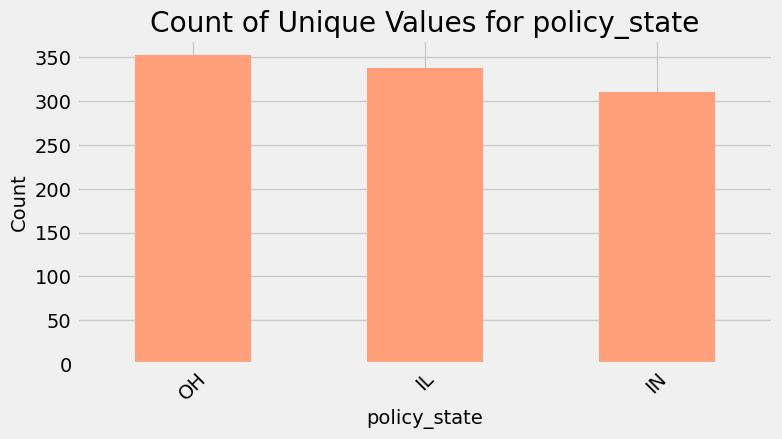

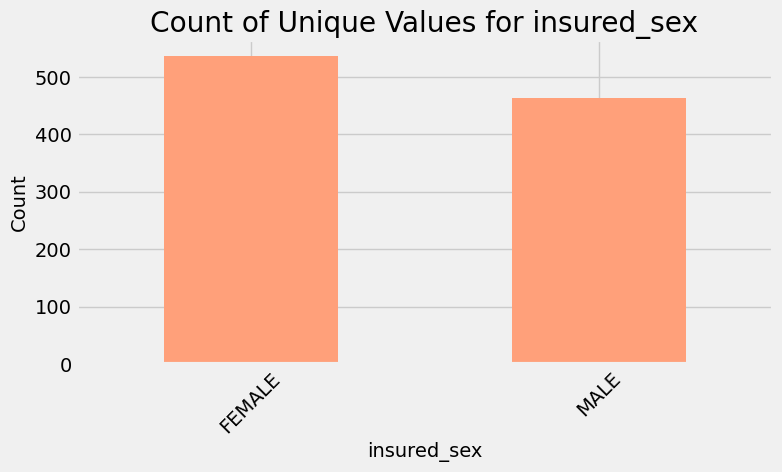

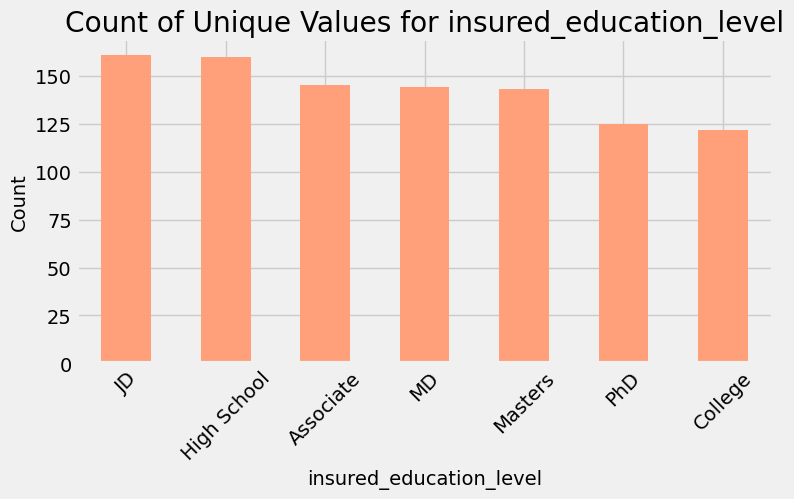

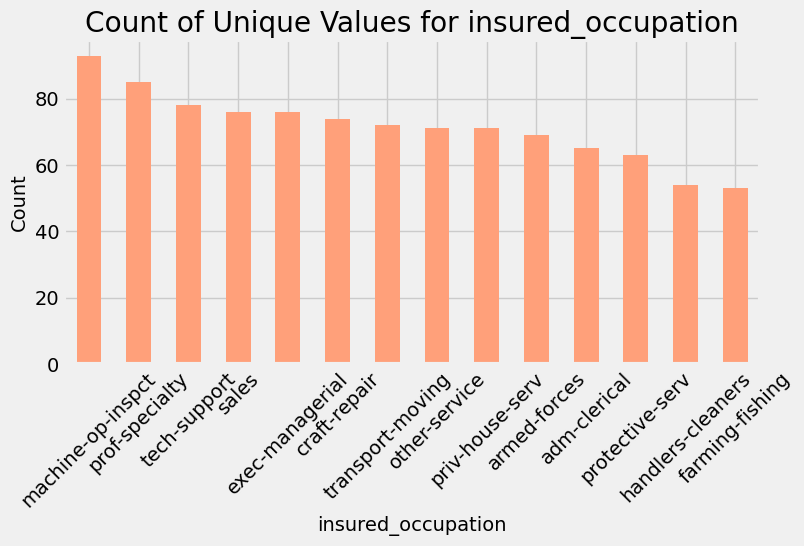

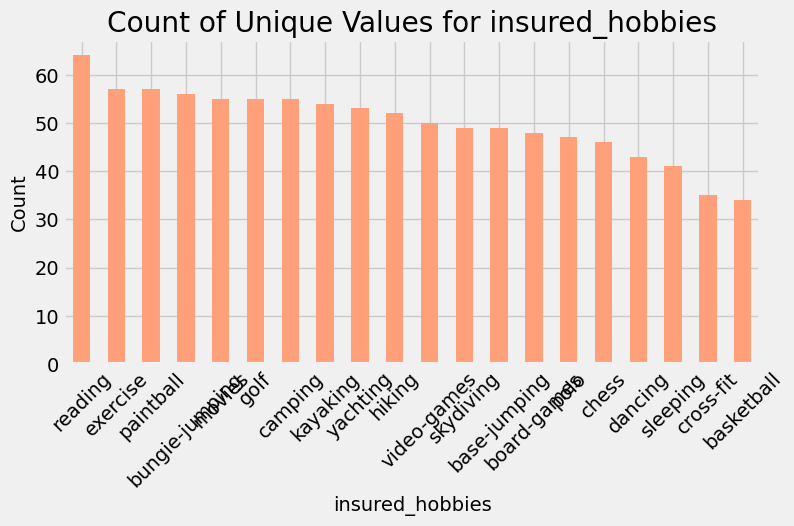

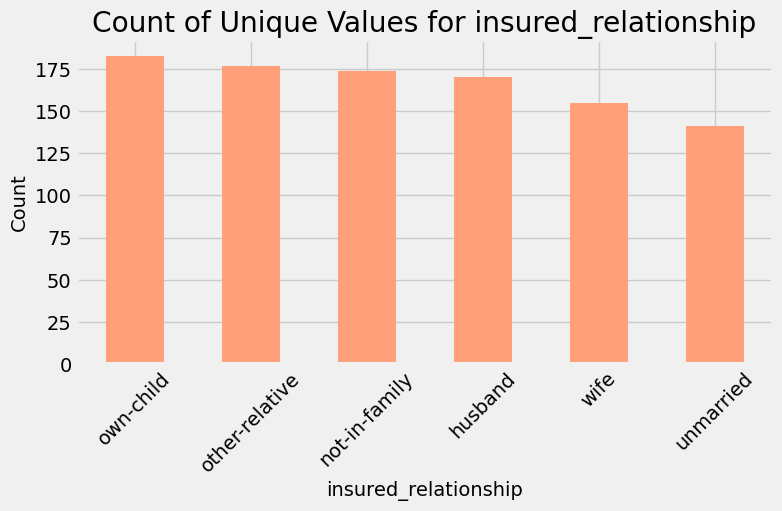

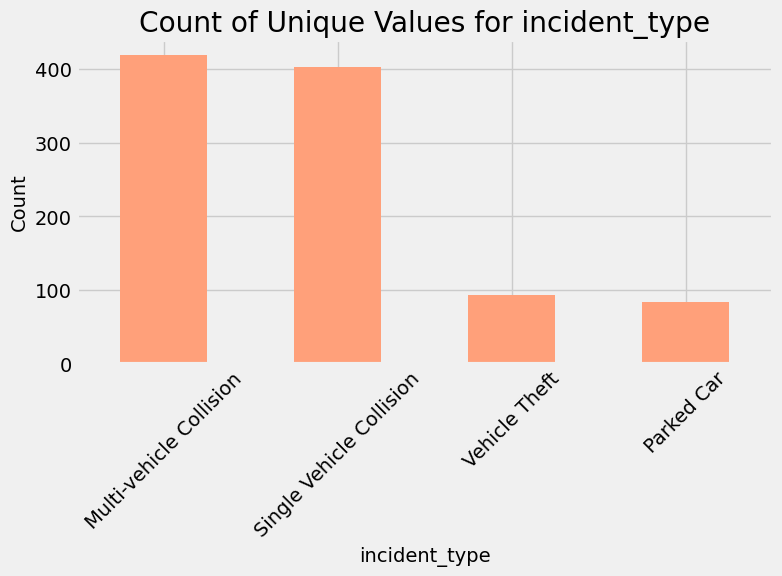

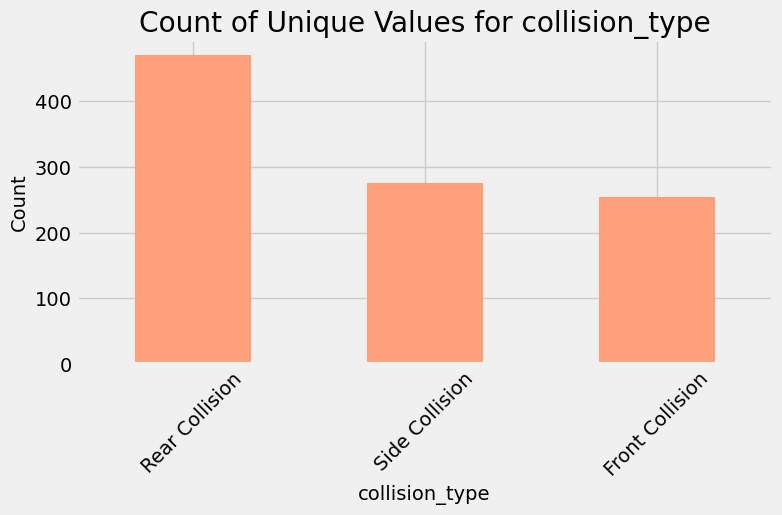

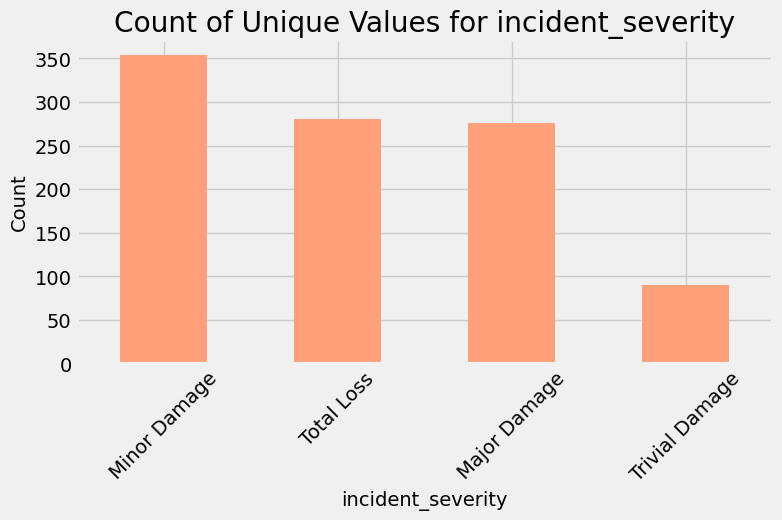

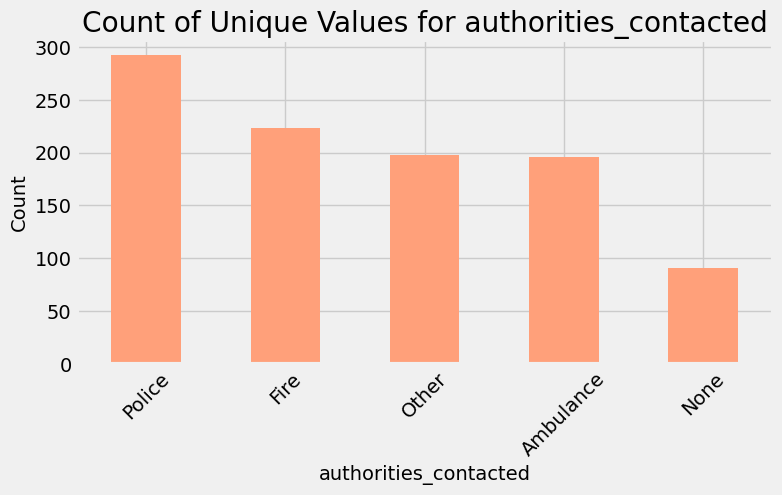

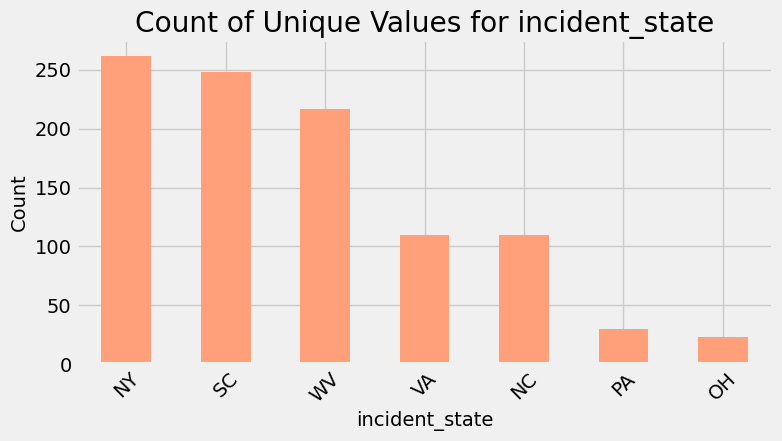

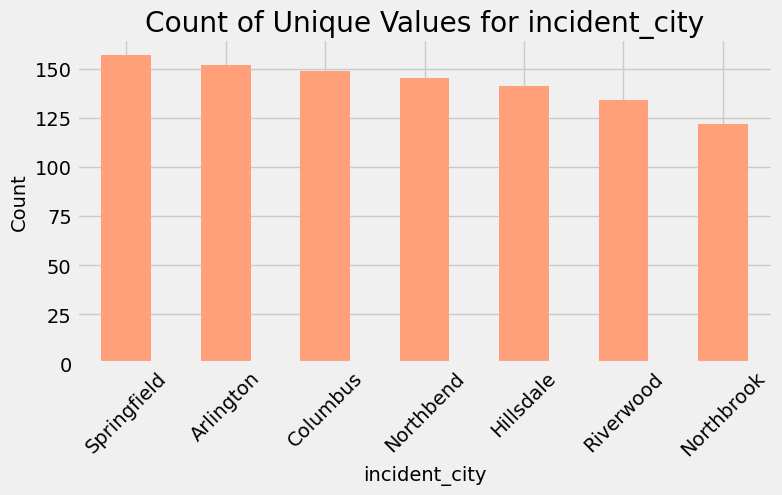

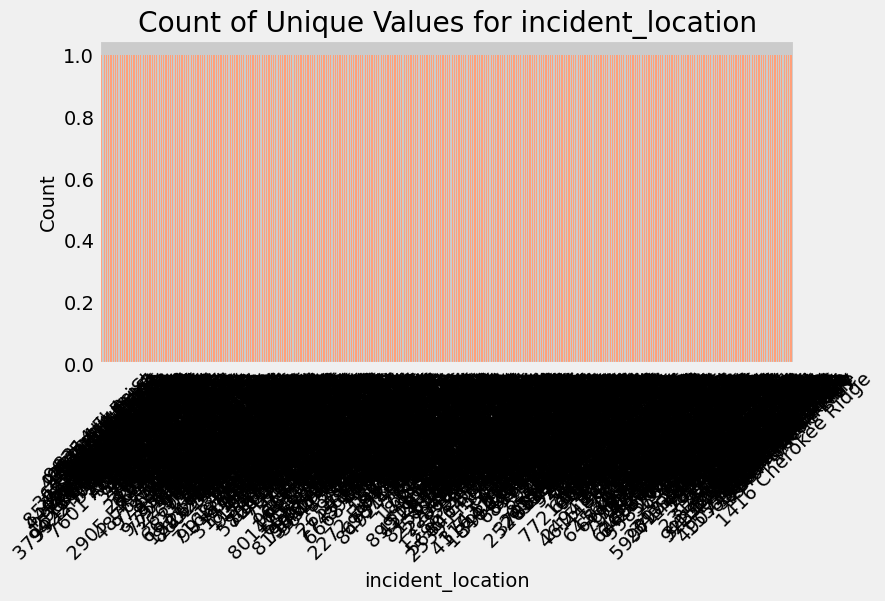

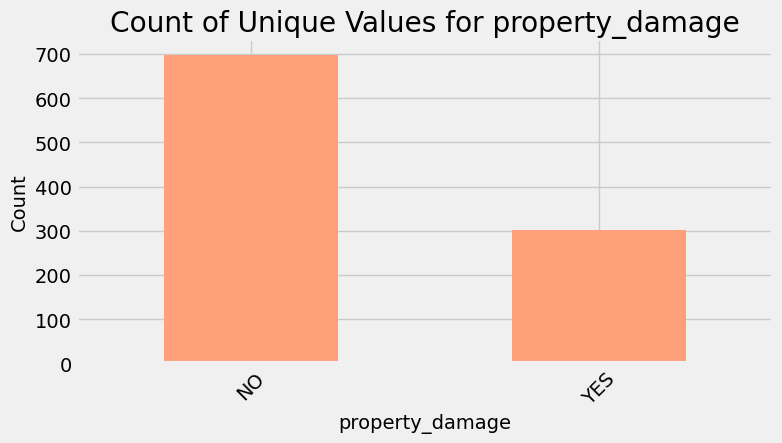

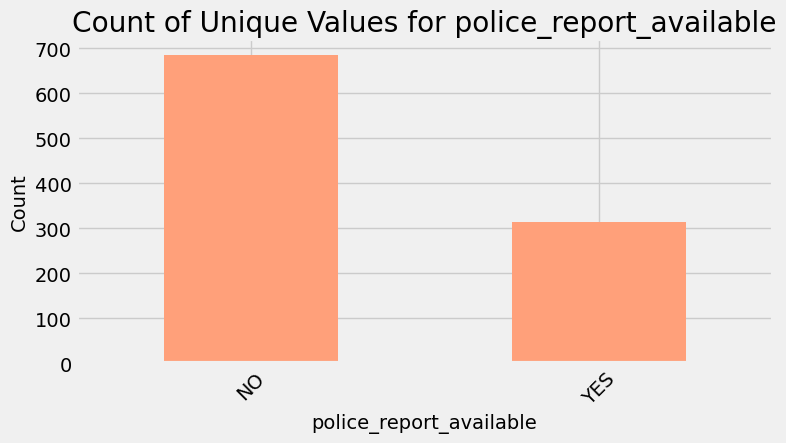

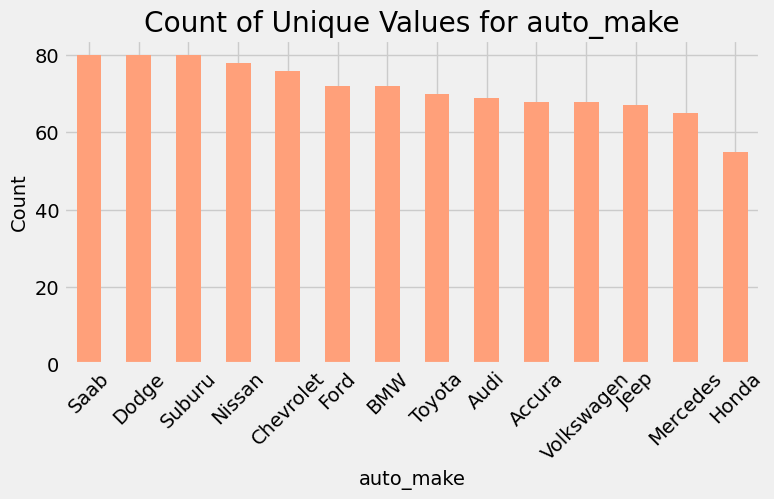

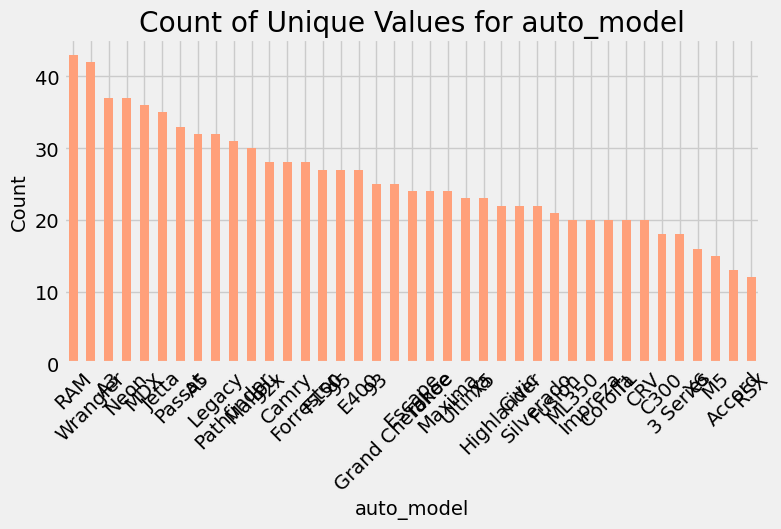

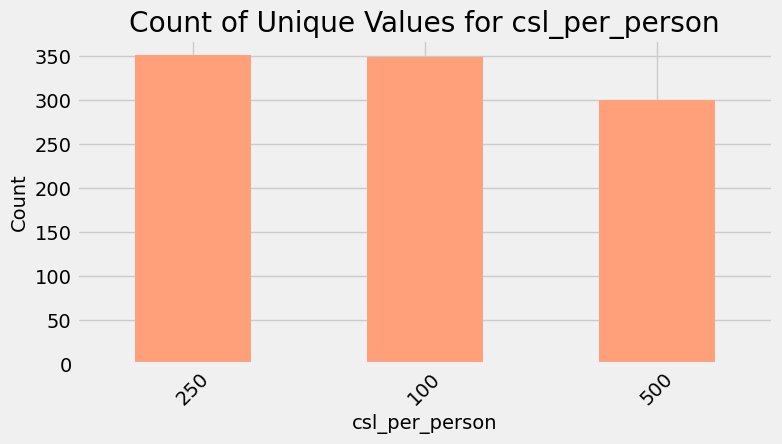

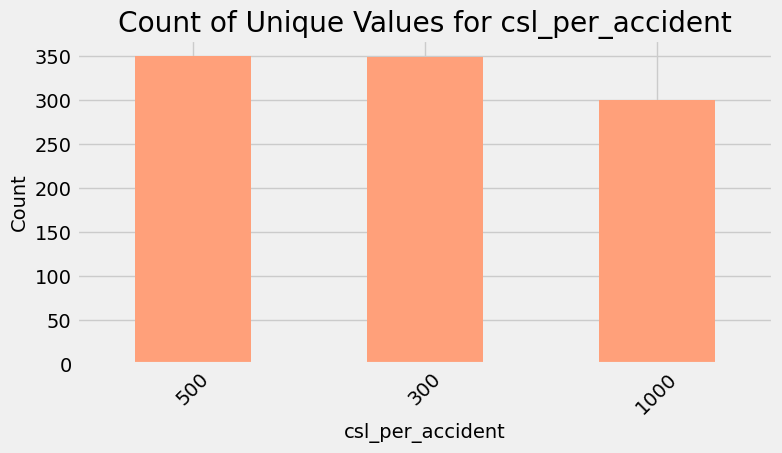

In [37]:
# Viusalize each categorical feature 
for feature in categorical_features:
    unique_values = data[feature].value_counts()
    
    # Plot a bar chart
    plt.figure(figsize=(8, 4))
    unique_values.plot(kind='bar', color='lightsalmon')
    
    # Customize the plot
    plt.title(f'Count of Unique Values for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45) 
    
    # Show the plot
    plt.show()


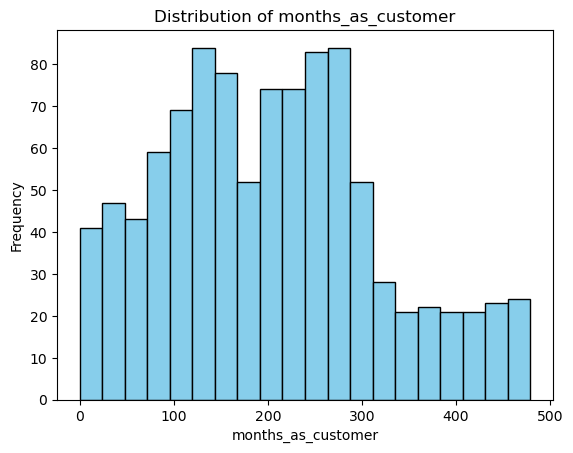

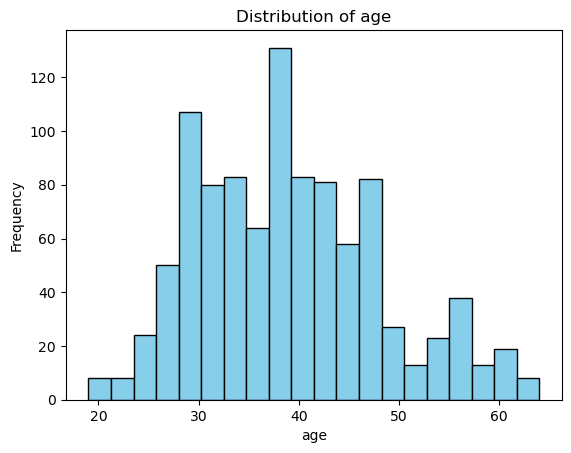

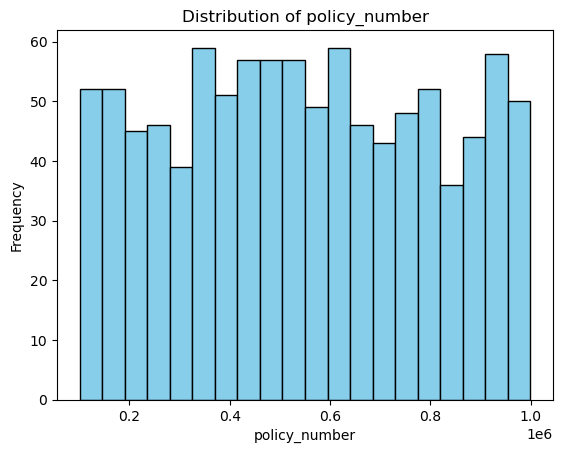

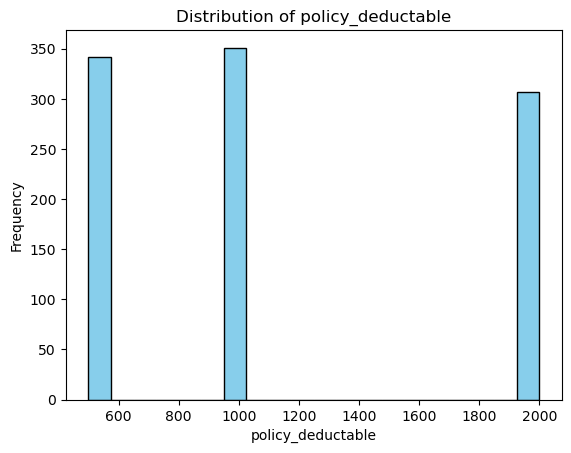

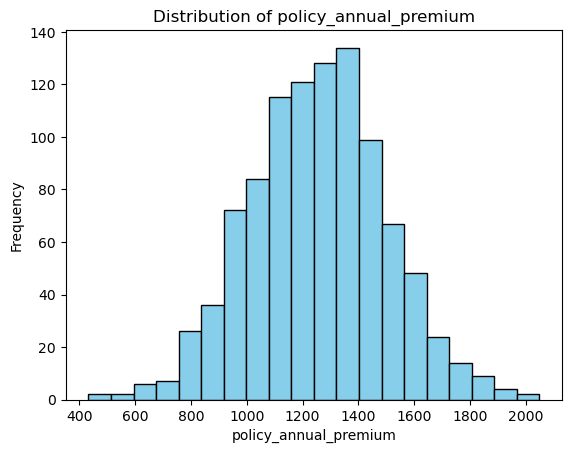

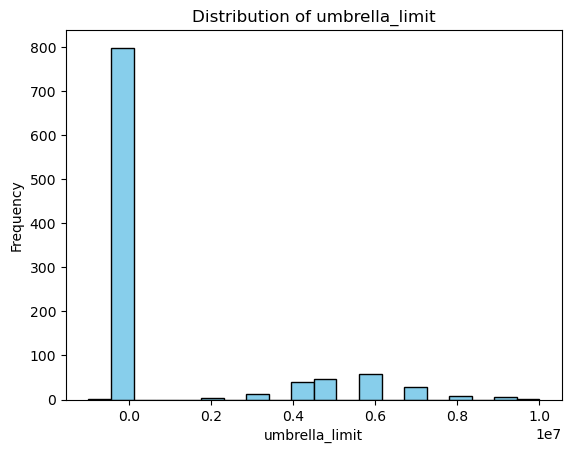

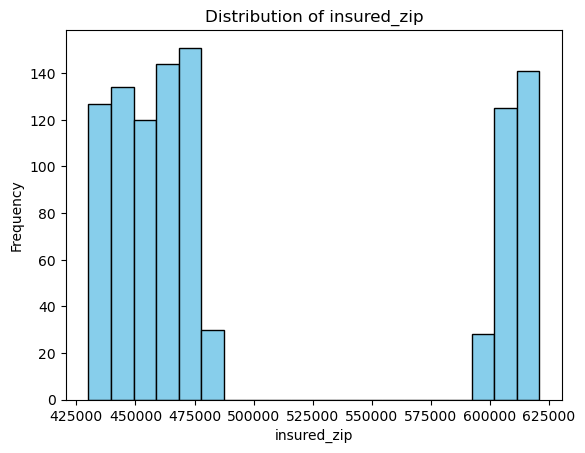

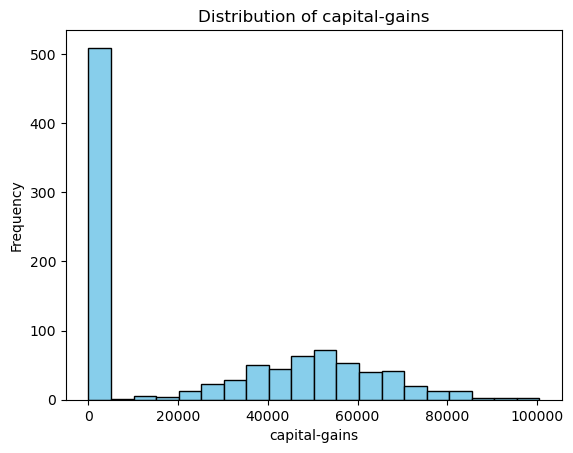

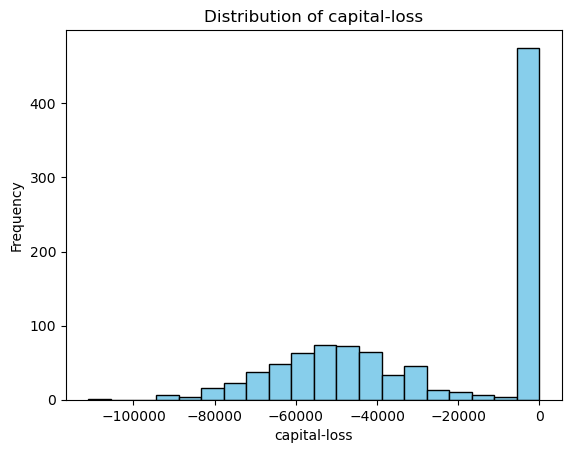

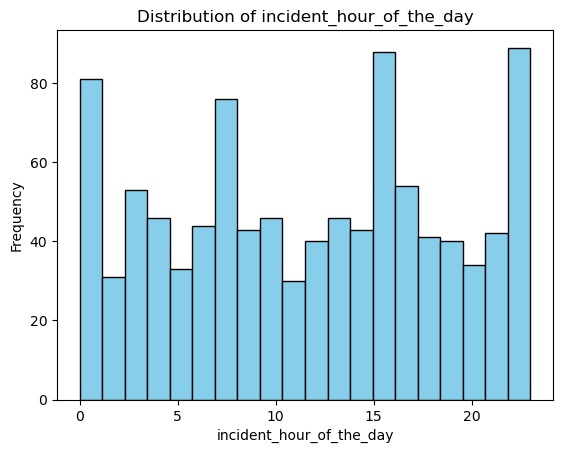

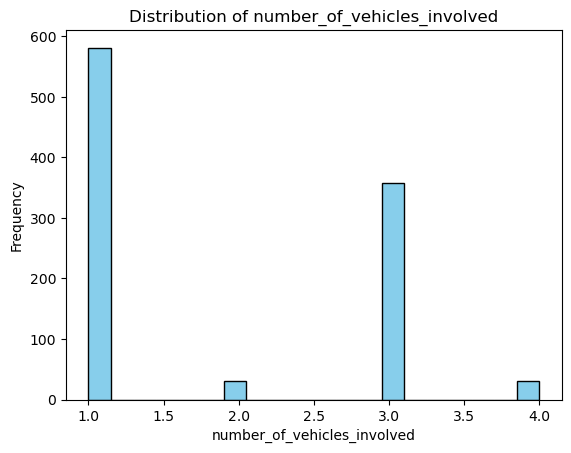

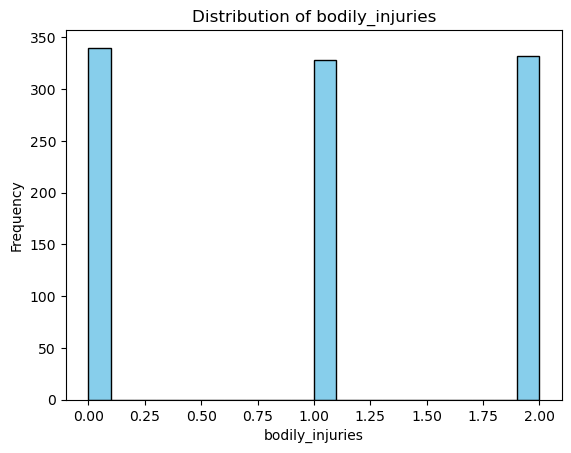

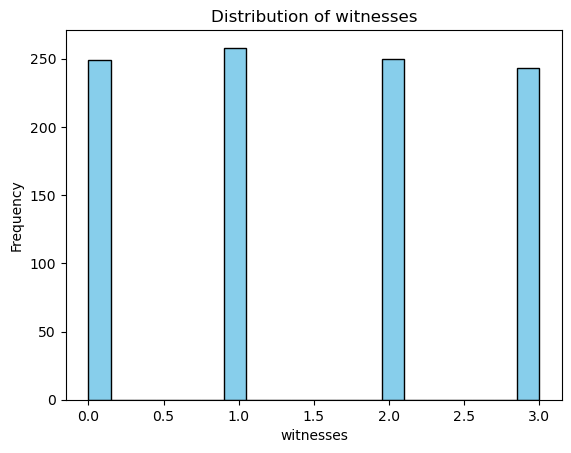

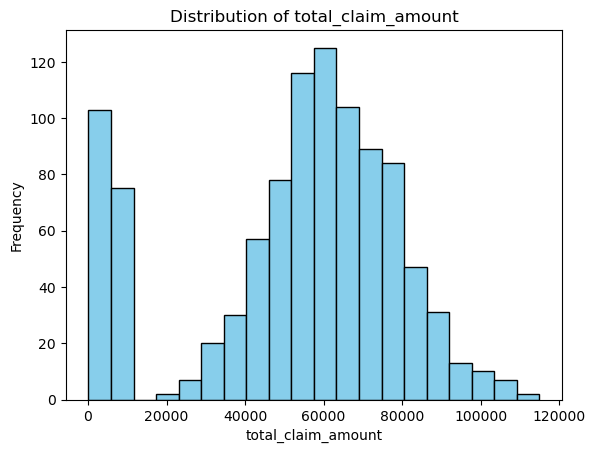

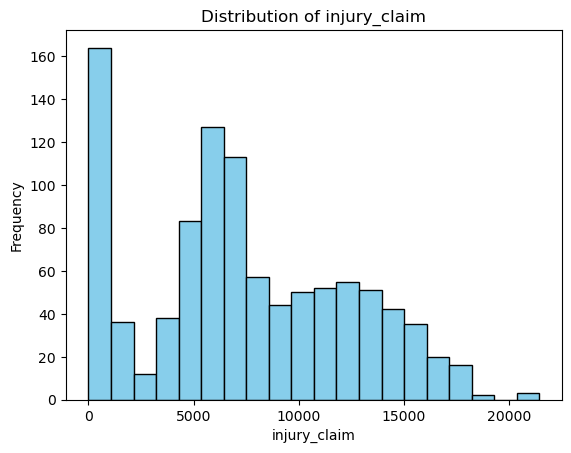

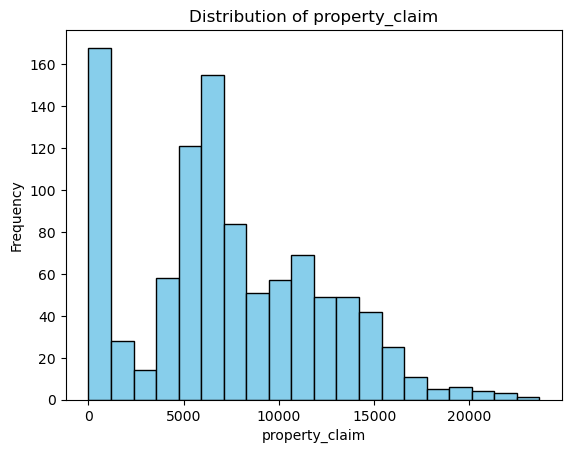

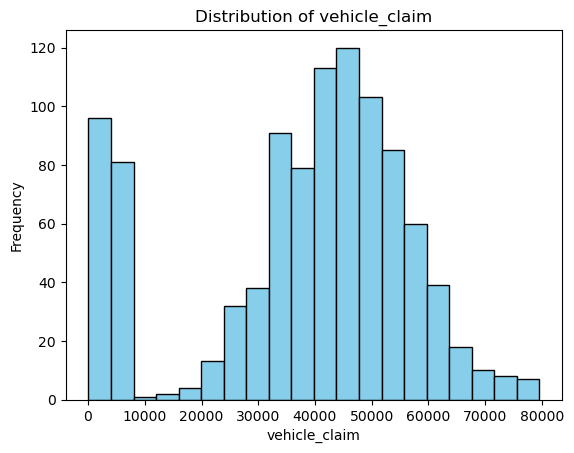

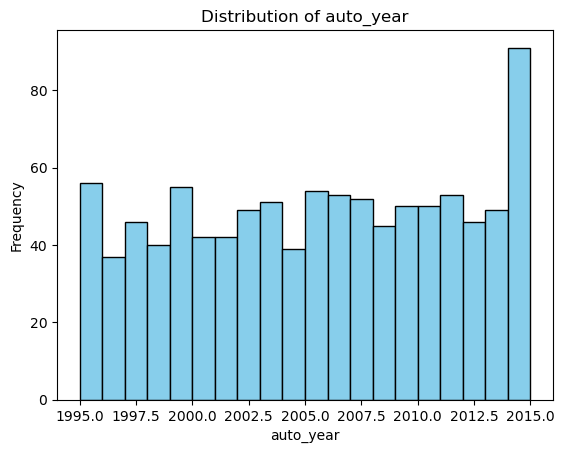

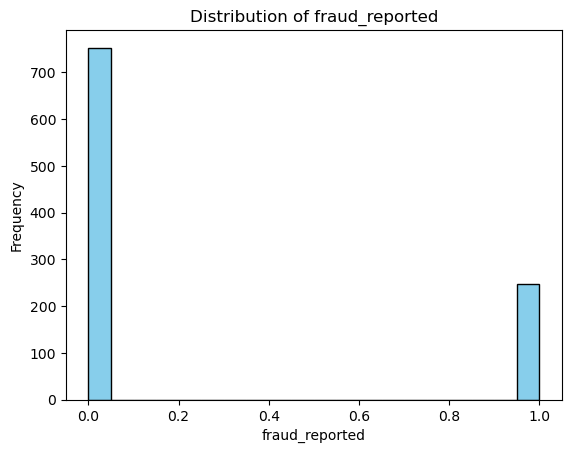

In [21]:
# Visualize each numerical feature 
for feature in numerical_features:
    unique_values = data[feature].value_counts()
    
    # Create a histogram for the current numerical feature
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    
    # Customize the plot
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.show()


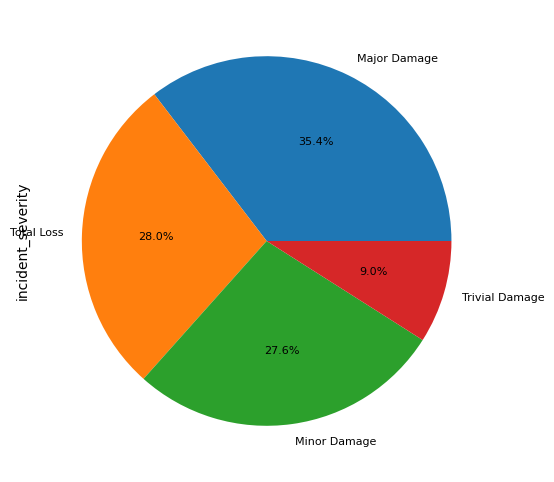

In [26]:
fig = plt.figure(figsize=(10,6))
ax = (data['incident_severity'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=8)  

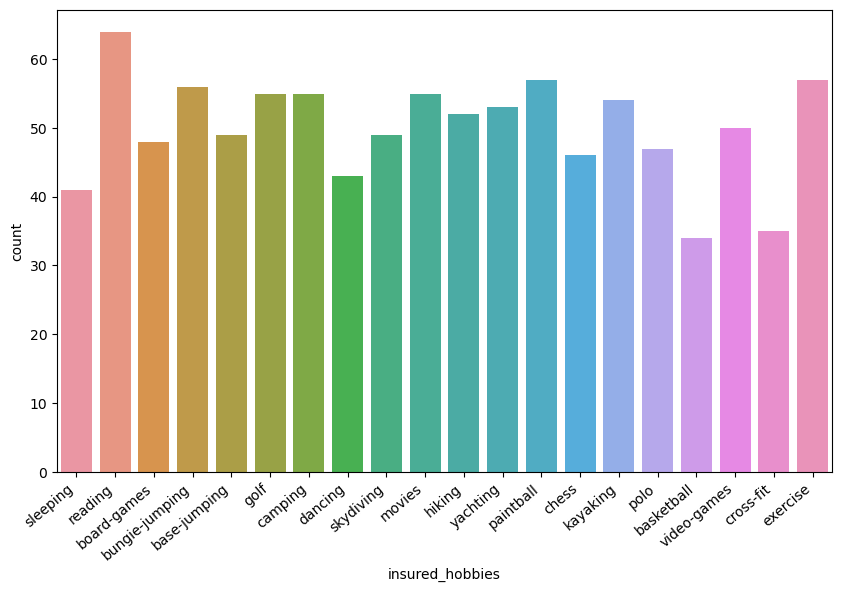

In [27]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

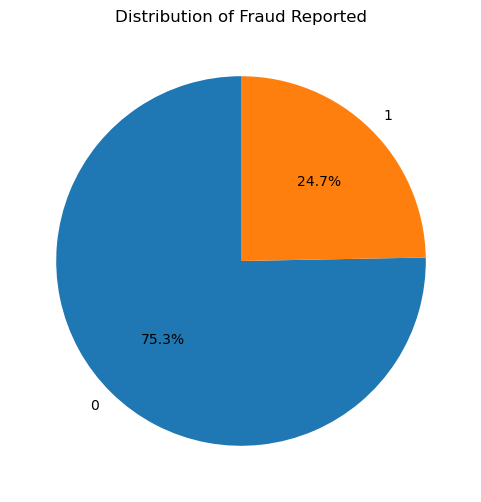

In [28]:
# Pie Chart for 'fraud_reported'
fraud_counts = data['fraud_reported'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraud Reported')
plt.show()

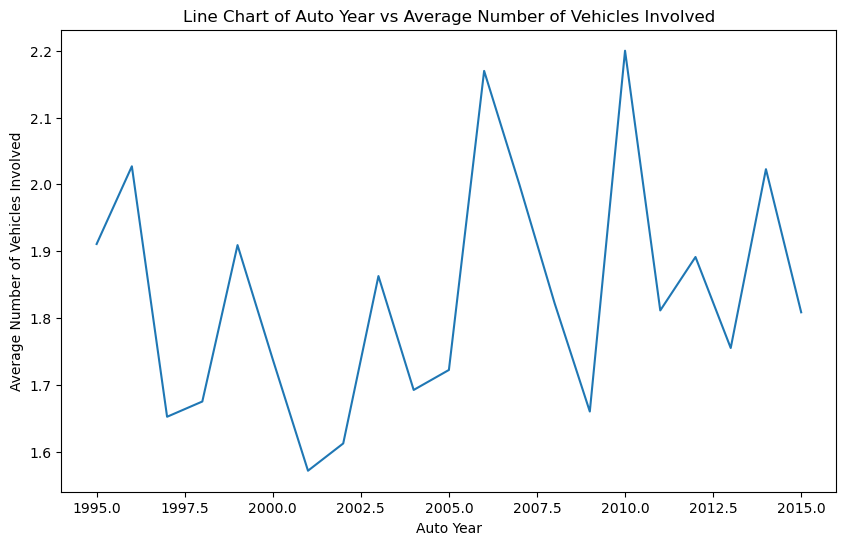

In [29]:
#  Line Chart with 'auto_year' and 'number_of_vehicles_involved'
yearly_vehicle_count = data.groupby('auto_year')['number_of_vehicles_involved'].mean()
plt.figure(figsize=(10, 6))
yearly_vehicle_count.plot(kind='line')
plt.xlabel('Auto Year')
plt.ylabel('Average Number of Vehicles Involved')
plt.title('Line Chart of Auto Year vs Average Number of Vehicles Involved')
plt.show()

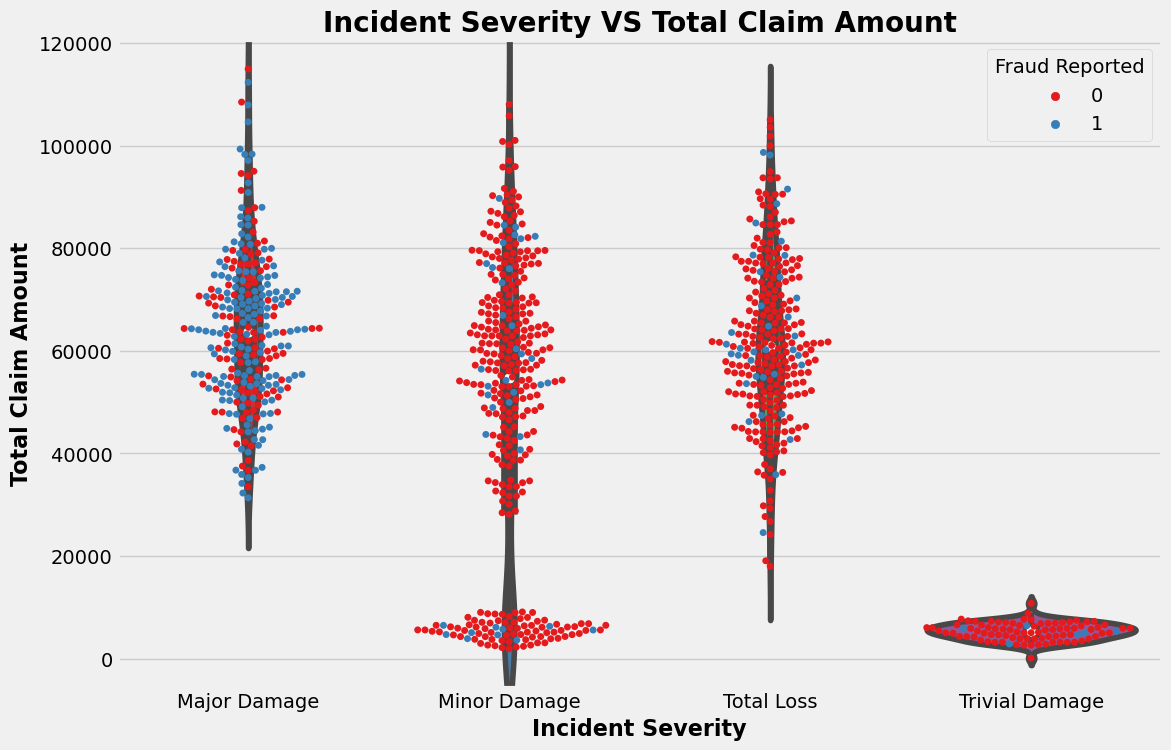

In [31]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)

sns.violinplot(x='incident_severity', y='total_claim_amount', data=data, palette='Set1')
sns.swarmplot(x='incident_severity', y='total_claim_amount', data=data, hue='fraud_reported', palette='Set1')

plt.title('Incident Severity VS Total Claim Amount', fontsize=20, fontweight='bold')
plt.xlabel('Incident Severity', fontsize=16, fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16, fontweight='bold')
plt.legend(title='Fraud Reported', title_fontsize='14')
plt.show()


In [41]:
#lets do Lable enconding coding to make more features 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [42]:
# droping columns based on above result
data.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

In [43]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(data[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
2,insured_hobbies,20
10,auto_make,14
1,insured_education_level,7
8,incident_state,7
9,incident_city,7
3,insured_relationship,6
7,authorities_contacted,5
4,incident_type,4
6,incident_severity,4
0,policy_state,3


In [44]:
data = pd.get_dummies(data)
print('Training Features shape: ', data.shape)

Training Features shape:  (1000, 107)


In [45]:
from imblearn.over_sampling import SMOTE

In [47]:
# Splitting data in target and dependent feature
X = data.drop(['fraud_reported'], axis =1)
Y = data['fraud_reported']

In [48]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [49]:
Y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,7.546365,months_as_customer
1,7.536807,age
2,1.086614,policy_deductable
3,1.100500,policy_annual_premium
4,1.112656,umbrella_limit
...,...,...
101,inf,csl_per_person_250
102,inf,csl_per_person_500
103,inf,csl_per_accident_1000
104,inf,csl_per_accident_300


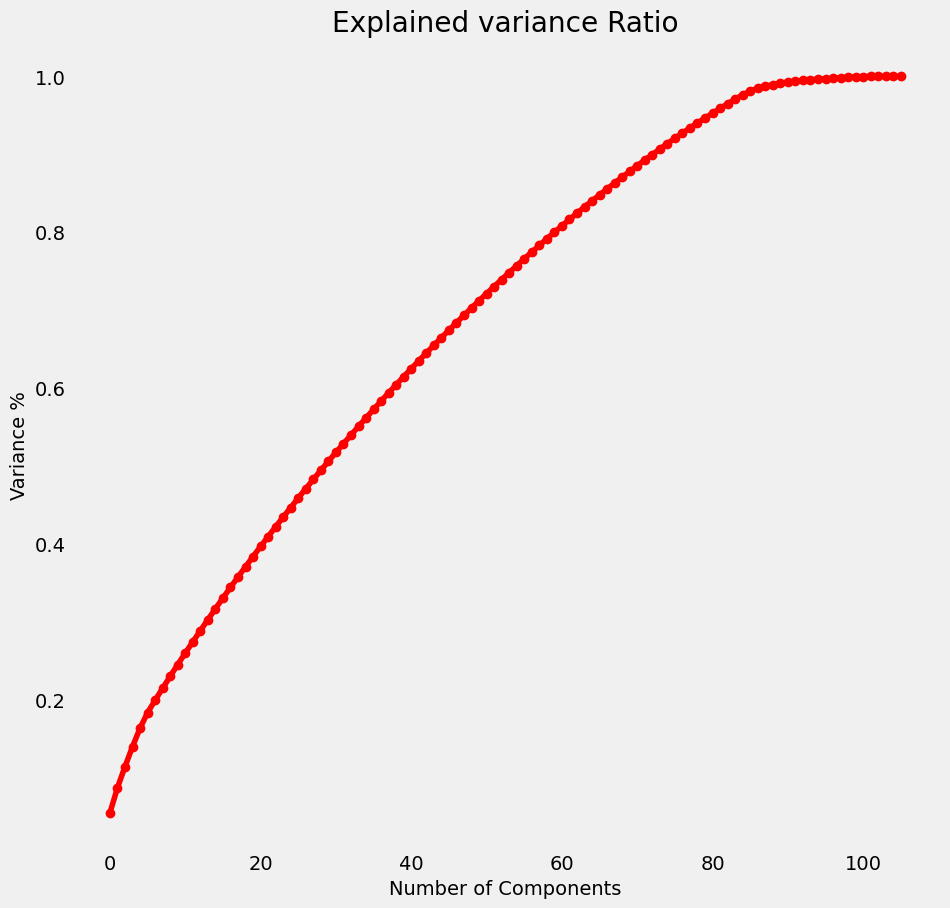

In [54]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()


In [56]:
pca_new = PCA(n_components=82)
x_new = pca_new.fit_transform(X_scale)


In [57]:
principle_x=pd.DataFrame(x_new,columns=np.arange(82))

### Machine Learning Model Building

In [86]:
# Import important libraries for model building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1054, 82)
Training target vector size: (1054,)
Test feature matrix size: (452, 82)
Test target vector size: (452,)


In [60]:
max_accuracy = 0
best_random_state = 0

# Loop through a range of random states to find the one with the highest accuracy
for random_state in range(1, 250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, test_size=0.3, random_state=random_state)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_random_state = random_state

print('Best accuracy is', max_accuracy, 'on Random_state', best_random_state)


Best accuracy is 0.9137168141592921 on Random_state 142


In [61]:
# Split the data using the best random state
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=best_random_state, test_size=0.3)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Print the evaluation metrics
print('Logistic Regression Evaluation')
print('Accuracy Score of Logistic Regression:', accuracy_score(Y_test, y_pred))
print('Confusion matrix of Logistic Regression:\n', confusion_matrix(Y_test, y_pred))
print('Classification Report of Logistic Regression:\n', classification_report(Y_test, y_pred))


Logistic Regression Evaluation
Accuracy Score of Logistic Regression: 0.9137168141592921
Confusion matrix of Logistic Regression:
 [[218  15]
 [ 24 195]]
Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       233
           1       0.93      0.89      0.91       219

    accuracy                           0.91       452
   macro avg       0.91      0.91      0.91       452
weighted avg       0.91      0.91      0.91       452



RMSE value for k = 1 is: 0.596820484120214
RMSE value for k = 2 is: 0.5565379710984114
RMSE value for k = 3 is: 0.661855797999181
RMSE value for k = 4 is: 0.6432082199096122
RMSE value for k = 5 is: 0.6976572680885752
RMSE value for k = 6 is: 0.6928841862643578
RMSE value for k = 7 is: 0.7008212628608497
RMSE value for k = 8 is: 0.6976572680885752
RMSE value for k = 9 is: 0.7055406512876979
RMSE value for k = 10 is: 0.7055406512876979
RMSE value for k = 11 is: 0.7117844955754465
RMSE value for k = 12 is: 0.7102286806100285
RMSE value for k = 13 is: 0.7133369172572831
RMSE value for k = 14 is: 0.7133369172572831
RMSE value for k = 15 is: 0.7164316689560741
RMSE value for k = 16 is: 0.7164316689560741
RMSE value for k = 17 is: 0.7164316689560741
RMSE value for k = 18 is: 0.7164316689560741
RMSE value for k = 19 is: 0.7164316689560741
RMSE value for k = 20 is: 0.7164316689560741
RMSE value for k = 21 is: 0.7179740424720916
RMSE value for k = 22 is: 0.7179740424720916
RMSE value for k = 23

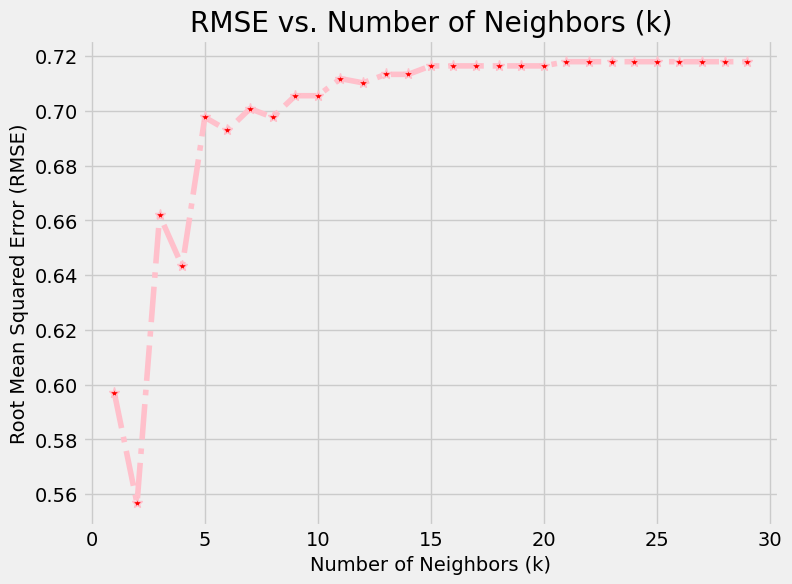

In [77]:
# Create an empty list to store RMSE values for different k
rmse_val = []

# Loop through different values of k
for K in range(1, 30):  
    model = neighbors.KNeighborsClassifier(n_neighbors=K)  # Create a KNN model with the current value of k
    
    model.fit(X_train, Y_train)  # Fit the model on the training data
    y_pred = model.predict(X_test)  # Make predictions on the test data
    
    # Calculate the RMSE (Root Mean Squared Error) between the true Y_test and predicted y_pred values
    error = sqrt(mean_squared_error(Y_test, y_pred))
    
    rmse_val.append(error)  # Store the RMSE values in the list
    
    # Print the RMSE value for the current k
    print('RMSE value for k =', K, 'is:', error)
    

    
    
    


# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a line plot to visualize RMSE values against different k values
plt.plot(range(1, 30), rmse_val, color='pink', linestyle='dashdot', marker='*', markerfacecolor='red', markersize=8)

# Set plot labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs. Number of Neighbors (k)')

# Display a grid for better readability
plt.grid(True)

In [82]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier()
        ]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print(  '=================================================================================================')
    print('********************************************Next Model*******************************************')
    print(  '=================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.9137168141592921


Confusion matrix : 
 [[218  15]
 [ 24 195]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       233
           1       0.93      0.89      0.91       219

    accuracy                           0.91       452
   macro avg       0.91      0.91      0.91       452
weighted avg       0.91      0.91      0.91       452



********************************************Next Model*******************************************
Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8783185840707964


Confusion matrix : 
 [[228   5]
 [ 50 169]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       233
           1       0.97      0.77      0.86       219

    accuracy                           0.88       452
   m

In [85]:
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print(  '=================================================================================================')
    print('********************************************Cross Validation Score ******************************')
    print(  '=================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.6589404  0.79069767 0.93355482 0.96345515 0.95016611]
Mean Score : 0.8593628303007634
Std deviation : 0.1178719247750354


********************************************Cross Validation Score ******************************


Cross Validation Score SVC() :

Score : [0.50993377 0.69767442 0.95348837 0.96345515 0.96345515]
Mean Score : 0.8176013729070867
Std deviation : 0.18442003693395717


********************************************Cross Validation Score ******************************


Cross Validation Score GaussianNB() :

Score : [0.5        0.68106312 1.         1.         1.        ]
Mean Score : 0.8362126245847176
Std deviation : 0.2086093046017464


********************************************Cross Validation Score ******************************


Cross Validation Score DecisionTreeClassifier() :

Score : [0.60927152 0.70431894 0.87375415 0.910299   0.87043189]
Mean Score : 0.7936151019779543
Std deviation : 0.11652860587

### Hyper Parameter Tuning : GridSearchCV

In [87]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [89]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.806 total time=   2.0s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.853 total time=   2.0s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.834 total time=   1.7s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples

[CV 4/5; 7/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.829 total time=   6.2s
[CV 5/5; 7/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300
[CV 5/5; 7/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.857 total time=   6.4s
[CV 1/5; 8/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 1/5; 8/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.815 total time=   8.3s
[CV 2/5; 8/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 2/5; 8/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.853 total time=   8.4s
[CV 3/5; 8/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 

[CV 2/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.853 total time=   3.7s
[CV 3/5; 14/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200
[CV 3/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.825 total time=   4.0s
[CV 4/5; 14/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200
[CV 4/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.829 total time=   4.0s
[CV 5/5; 14/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200
[CV 5/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.857 total time=   3.7s
[CV 1/5; 15/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_est

[CV 5/5; 20/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.843 total time=   8.3s
[CV 1/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 1/5; 21/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.806 total time=   1.9s
[CV 2/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 2/5; 21/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.848 total time=   2.0s
[CV 3/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 3/5; 21/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.839 total time=   2.0s
[CV 4/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=

[CV 3/5; 27/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.820 total time=   6.1s
[CV 4/5; 27/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300
[CV 4/5; 27/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.829 total time=   5.9s
[CV 5/5; 27/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300
[CV 5/5; 27/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.843 total time=   6.2s
[CV 1/5; 28/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 1/5; 28/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.810 total time=   8.2s
[CV 2/5; 28/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=

[CV 1/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.810 total time=   3.1s
[CV 2/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 2/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.848 total time=   3.2s
[CV 3/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 3/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.825 total time=   3.2s
[CV 4/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 4/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.839 total time=   3.1s
[CV 5/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=

[CV 4/5; 40/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.834 total time=   6.2s
[CV 5/5; 40/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 40/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.852 total time=   6.3s
[CV 1/5; 41/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 1/5; 41/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.806 total time=   1.5s
[CV 2/5; 41/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 2/5; 41/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.848 total time=   1.5s
[CV 3/5; 41/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=

[CV 2/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.853 total time=   4.6s
[CV 3/5; 47/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 3/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.825 total time=   4.6s
[CV 4/5; 47/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.834 total time=   2.9s
[CV 5/5; 47/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 5/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.843 total time=   1.4s
[CV 1/5; 48/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_est

[CV 5/5; 53/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.852 total time=   2.1s
[CV 1/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 1/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.806 total time=   4.4s
[CV 2/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 2/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.848 total time=   4.4s
[CV 3/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 3/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.829 total time=   4.5s
[CV 4/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=

[CV 3/5; 60/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.825 total time=   9.1s
[CV 4/5; 60/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 4/5; 60/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.829 total time=   8.8s
[CV 5/5; 60/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 5/5; 60/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.848 total time=   8.5s
[CV 1/5; 61/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=100
[CV 1/5; 61/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=100;, score=0.806 total time=   2.0s
[CV 2/5; 61/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimato

[CV 1/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.810 total time=   5.8s
[CV 2/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300
[CV 2/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.848 total time=   6.1s
[CV 3/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300
[CV 3/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.825 total time=   6.2s
[CV 4/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300
[CV 4/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.825 total time=   5.6s
[CV 5/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=

[CV 4/5; 73/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.834 total time=   2.1s
[CV 5/5; 73/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 5/5; 73/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.848 total time=   2.1s
[CV 1/5; 74/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200
[CV 1/5; 74/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.801 total time=   4.3s
[CV 2/5; 74/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200
[CV 2/5; 74/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.853 total time=   4.3s
[CV 3/5; 74/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=

[CV 2/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.853 total time=   8.8s
[CV 3/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 3/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.825 total time=   8.6s
[CV 4/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 4/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.825 total time=   8.7s
[CV 5/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 5/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.848 total time=   8.5s
[CV 1/5; 81/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=3, n_esti

[CV 5/5; 86/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.867 total time=   3.4s
[CV 1/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 1/5; 87/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.810 total time=   5.1s
[CV 2/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 2/5; 87/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.848 total time=   5.1s
[CV 3/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 3/5; 87/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.820 total time=   5.0s
[CV 4/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=

[CV 3/5; 93/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.825 total time=   1.6s
[CV 4/5; 93/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100
[CV 4/5; 93/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.829 total time=   1.6s
[CV 5/5; 93/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100
[CV 5/5; 93/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.843 total time=   1.6s
[CV 1/5; 94/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200
[CV 1/5; 94/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200;, score=0.801 total time=   3.3s
[CV 2/5; 94/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_est

[CV 1/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.815 total time=   9.0s
[CV 2/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400
[CV 2/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.844 total time=   8.9s
[CV 3/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400
[CV 3/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.820 total time=   8.9s
[CV 4/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400
[CV 4/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.829 total time=   9.0s
[CV 5/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_est

[CV 4/5; 106/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.829 total time=   4.5s
[CV 5/5; 106/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=200
[CV 5/5; 106/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.848 total time=   4.5s
[CV 1/5; 107/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300
[CV 1/5; 107/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.810 total time=   6.6s
[CV 2/5; 107/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300
[CV 2/5; 107/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.848 total time=   6.8s
[CV 3/5; 107/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_est

[CV 2/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.834 total time=   2.2s
[CV 3/5; 113/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 3/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.825 total time=   2.1s
[CV 4/5; 113/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 4/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.839 total time=   2.1s
[CV 5/5; 113/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 5/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.848 total time=   2.1s
[CV 1/5; 114/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_est

[CV 5/5; 119/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.848 total time=   7.2s
[CV 1/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 1/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.801 total time=   9.5s
[CV 2/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 2/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.848 total time=   9.5s
[CV 3/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 3/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.820 total time=   9.6s
[CV 4/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_est

[CV 3/5; 126/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.820 total time=   4.2s
[CV 4/5; 126/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200
[CV 4/5; 126/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.829 total time=   4.4s
[CV 5/5; 126/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200
[CV 5/5; 126/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.852 total time=   4.2s
[CV 1/5; 127/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 1/5; 127/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.806 total time=   6.5s
[CV 2/5; 127/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=1

[CV 1/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.810 total time=   1.8s
[CV 2/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 2/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.858 total time=   1.6s
[CV 3/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 3/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.820 total time=   1.7s
[CV 4/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 4/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.825 total time=   1.7s
[CV 5/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_est

[CV 4/5; 139/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.834 total time=   5.1s
[CV 5/5; 139/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300
[CV 5/5; 139/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.848 total time=   5.2s
[CV 1/5; 140/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400
[CV 1/5; 140/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.806 total time=   7.0s
[CV 2/5; 140/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400
[CV 2/5; 140/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.853 total time=   6.8s
[CV 3/5; 140/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_est

[CV 2/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.863 total time=   5.2s
[CV 3/5; 146/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200
[CV 3/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.825 total time=   5.1s
[CV 4/5; 146/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200
[CV 4/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.829 total time=   5.3s
[CV 5/5; 146/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200
[CV 5/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.838 total time=   5.2s
[CV 1/5; 147/288] START criterion=entropy, max_depth=10, max_features=auto, mi

[CV 4/5; 152/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.829 total time=  10.3s
[CV 5/5; 152/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 152/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.852 total time=  10.4s
[CV 1/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 153/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.815 total time=   2.4s
[CV 2/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 2/5; 153/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.844 total time=   2.5s
[CV 3/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, mi

[CV 1/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.810 total time=   7.6s
[CV 2/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 2/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.844 total time=   7.6s
[CV 3/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 3/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.820 total time=   7.7s
[CV 4/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 4/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.825 total time=   7.7s
[CV 5/5; 159/288] START criterion=entropy, max_depth=10, max_features=a

[CV 3/5; 165/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.825 total time=   2.6s
[CV 4/5; 165/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 4/5; 165/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.834 total time=   2.6s
[CV 5/5; 165/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 5/5; 165/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.857 total time=   2.5s
[CV 1/5; 166/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 1/5; 166/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.806 total time=   5.1s
[CV 2/5; 166/288] START criterion=entropy, max_depth=10, max_features=sqrt, mi

[CV 5/5; 171/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.852 total time=   7.7s
[CV 1/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 1/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.810 total time=  10.2s
[CV 2/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 2/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.848 total time=  10.3s
[CV 3/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 3/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.820 total time=  10.4s
[CV 4/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, mi

[CV 2/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.853 total time=   4.0s
[CV 3/5; 178/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 3/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.820 total time=   3.9s
[CV 4/5; 178/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 4/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.834 total time=   3.9s
[CV 5/5; 178/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 5/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.852 total time=   3.9s
[CV 1/5; 179/288] START criterion=entropy, max_depth=10, max_features=log2, mi

[CV 4/5; 184/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.829 total time=   7.9s
[CV 5/5; 184/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 184/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.848 total time=   8.0s
[CV 1/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 1/5; 185/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.806 total time=   1.9s
[CV 2/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 2/5; 185/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.858 total time=   1.9s
[CV 3/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, mi

[CV 1/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.806 total time=   5.8s
[CV 2/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 2/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.858 total time=   5.9s
[CV 3/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 3/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.825 total time=   3.1s
[CV 4/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.834 total time=   1.7s
[CV 5/5; 191/288] START criterion=entropy, max_depth=10, max_features=l

[CV 3/5; 197/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.820 total time=   2.6s
[CV 4/5; 197/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100
[CV 4/5; 197/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.829 total time=   2.7s
[CV 5/5; 197/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100
[CV 5/5; 197/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.852 total time=   2.7s
[CV 1/5; 198/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 1/5; 198/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.810 total time=   5.3s
[CV 2/5; 198/288] START criterion=entropy, max_depth=20, max_features=auto, mi

[CV 5/5; 203/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.852 total time=   7.8s
[CV 1/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 1/5; 204/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.810 total time=  10.9s
[CV 2/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 2/5; 204/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.848 total time=  10.8s
[CV 3/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 3/5; 204/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.825 total time=  10.7s
[CV 4/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, mi

[CV 2/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.858 total time=   5.3s
[CV 3/5; 210/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 3/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.825 total time=   5.3s
[CV 4/5; 210/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 4/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.825 total time=   5.4s
[CV 5/5; 210/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 5/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.852 total time=   5.4s
[CV 1/5; 211/288] START criterion=entropy, max_depth=20, max_features=sqrt, mi

[CV 4/5; 216/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.825 total time=  10.8s
[CV 5/5; 216/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 5/5; 216/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.848 total time=  10.5s
[CV 1/5; 217/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 1/5; 217/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.815 total time=   2.7s
[CV 2/5; 217/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 2/5; 217/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.853 total time=   2.8s
[CV 3/5; 217/288] START criterion=entropy, max_depth=20, max_features=sqrt, mi

[CV 1/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.815 total time=   7.8s
[CV 2/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 2/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.853 total time=   7.8s
[CV 3/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 3/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.825 total time=   8.1s
[CV 4/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 4/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.834 total time=   8.1s
[CV 5/5; 223/288] START criterion=entropy, max_depth=20, max_features=s

[CV 3/5; 229/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.825 total time=   1.9s
[CV 4/5; 229/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100
[CV 4/5; 229/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.839 total time=   2.0s
[CV 5/5; 229/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100
[CV 5/5; 229/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.848 total time=   2.0s
[CV 1/5; 230/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200
[CV 1/5; 230/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.810 total time=   4.0s
[CV 2/5; 230/288] START criterion=entropy, max_depth=20, max_features=log2, mi

[CV 5/5; 235/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.843 total time=   6.0s
[CV 1/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400
[CV 1/5; 236/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.806 total time=   8.1s
[CV 2/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400
[CV 2/5; 236/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.848 total time=   8.5s
[CV 3/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400
[CV 3/5; 236/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.820 total time=   7.1s
[CV 4/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, mi

[CV 2/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.844 total time=   5.0s
[CV 3/5; 242/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200
[CV 3/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.825 total time=   5.1s
[CV 4/5; 242/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200
[CV 4/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.820 total time=   5.0s
[CV 5/5; 242/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200
[CV 5/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.852 total time=   5.5s
[CV 1/5; 243/288] START criterion=entropy, max_depth=30, max_features=auto, mi

[CV 4/5; 248/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.829 total time=  10.7s
[CV 5/5; 248/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 248/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.852 total time=  10.7s
[CV 1/5; 249/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 249/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.815 total time=   2.6s
[CV 2/5; 249/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100
[CV 2/5; 249/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.839 total time=   2.6s
[CV 3/5; 249/288] START criterion=entropy, max_depth=30, max_features=auto, mi

[CV 1/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.806 total time=   7.8s
[CV 2/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 2/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.848 total time=   7.9s
[CV 3/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 3/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.825 total time=   7.3s
[CV 4/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 4/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.829 total time=   8.0s
[CV 5/5; 255/288] START criterion=entropy, max_depth=30, max_features=a

[CV 3/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.825 total time=   2.5s
[CV 4/5; 261/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 4/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.834 total time=   2.6s
[CV 5/5; 261/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 5/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.843 total time=   2.7s
[CV 1/5; 262/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 1/5; 262/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.806 total time=   5.1s
[CV 2/5; 262/288] START criterion=entropy, max_depth=30, max_features=sqrt, mi

[CV 5/5; 267/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.848 total time=   3.2s
[CV 1/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 1/5; 268/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.806 total time=   4.1s
[CV 2/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 2/5; 268/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.848 total time=   4.3s
[CV 3/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 3/5; 268/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.825 total time=   4.2s
[CV 4/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, mi

[CV 2/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.853 total time=   1.7s
[CV 3/5; 274/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200
[CV 3/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.829 total time=   1.7s
[CV 4/5; 274/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200
[CV 4/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.834 total time=   1.6s
[CV 5/5; 274/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200
[CV 5/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.843 total time=   1.8s
[CV 1/5; 275/288] START criterion=entropy, max_depth=30, max_features=log2, mi

[CV 4/5; 280/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.834 total time=   3.5s
[CV 5/5; 280/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 280/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.843 total time=   3.2s
[CV 1/5; 281/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100
[CV 1/5; 281/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.806 total time=   0.7s
[CV 2/5; 281/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100
[CV 2/5; 281/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.853 total time=   0.8s
[CV 3/5; 281/288] START criterion=entropy, max_depth=30, max_features=log2, mi

[CV 1/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.806 total time=   2.5s
[CV 2/5; 287/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300
[CV 2/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.853 total time=   2.6s
[CV 3/5; 287/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300
[CV 3/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.820 total time=   2.5s
[CV 4/5; 287/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.834 total time=   2.4s
[CV 5/5; 287/288] START criterion=entropy, max_depth=30, max_features=l

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [90]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_split': 11,
 'n_estimators': 100}

In [91]:
Final_mod =RandomForestClassifier(criterion='gini',n_estimators= 200, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8495575221238938


In [92]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_Final.pkl')

['Insurance_claims_Final.pkl']

In [93]:
# Prediction
prediction = Final_mod.predict(X_test)

In [95]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [96]:
### The End